# **Machine Learning 3**

**Multiple Linear Regression**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {'x1': [89, 66, 78, 111, 44, 77, 80, 66, 109, 76],
        'x2': [4, 1, 3, 6, 1, 3, 3, 2, 5, 3],
        'x3': [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25],
        'y': [7.0, 5.4, 6.6, 7.4, 4.8, 6.4, 7.0, 5.6, 7.3, 6.4]}

df = pd.DataFrame(data)

print(df)

    x1  x2    x3    y
0   89   4  3.84  7.0
1   66   1  3.19  5.4
2   78   3  3.78  6.6
3  111   6  3.89  7.4
4   44   1  3.57  4.8
5   77   3  3.57  6.4
6   80   3  3.03  7.0
7   66   2  3.51  5.6
8  109   5  3.54  7.3
9   76   3  3.25  6.4


## **Overfitting:**

**Checking Relation of dependent and independent variable and also feature correlation with each other.**

In [4]:
covx1andy = np.cov(df["x1"], df["y"])
print("covariance x1 and y: \n", covx1andy)

covx2andy = np.cov(df["x2"], df["y"])
print("covariance x2 and y: \n", covx2andy)
covx3andy = np.cov(df["x3"], df["y"])
print("covariance x3 and y: \n", covx3andy)

covariance x1 and y: 
 [[399.82222222  16.09555556]
 [ 16.09555556   0.75211111]]
covariance x2 and y: 
 [[2.54444444 1.26777778]
 [1.26777778 0.75211111]]
covariance x3 and y: 
 [[0.08157889 0.06618889]
 [0.06618889 0.75211111]]


In [5]:
covx1andy = np.corrcoef(df["x1"], df["y"])
print("corrcoef x1 and y: \n", covx1andy)

covx2andy = np.corrcoef(df["x2"], df["y"])
print("corrcoef x2 and y: \n", covx2andy)
covx3andy = np.corrcoef(df["x3"], df["y"])
print("corrcoef x3 and y: \n", covx3andy)

corrcoef x1 and y: 
 [[1.        0.9281785]
 [0.9281785 1.       ]]
corrcoef x2 and y: 
 [[1.        0.9164434]
 [0.9164434 1.       ]]
corrcoef x3 and y: 
 [[1.         0.26721153]
 [0.26721153 1.        ]]


corrcoef x1 and y: 
 [[1.        0.9281785]
 [0.9281785 1.       ]]


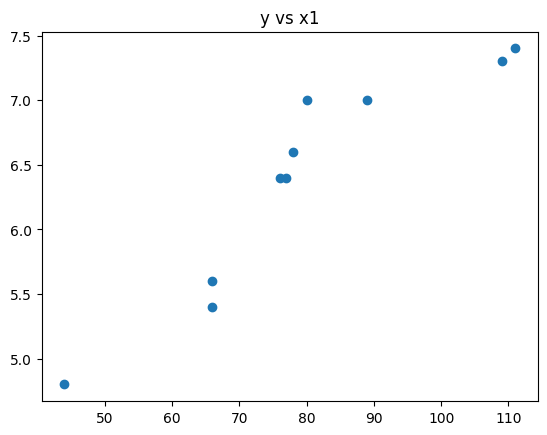

corrcoef x2 and y: 
 [[1.        0.9164434]
 [0.9164434 1.       ]]


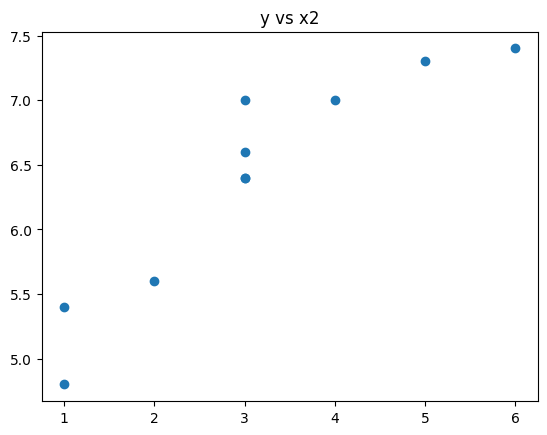

corrcoef x3 and y: 
 [[1.         0.26721153]
 [0.26721153 1.        ]]


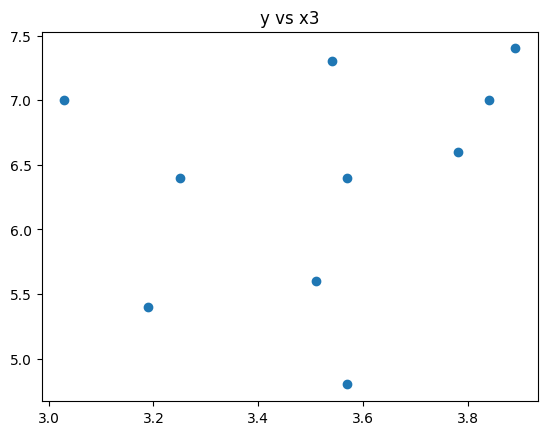

In [6]:
print("corrcoef x1 and y: \n", covx1andy)
plt.scatter(x=df["x1"], y=df["y"])
plt.xlabel = "x1"
plt.ylabel = "y"
plt.title("y vs x1")
plt.show()

print("corrcoef x2 and y: \n", covx2andy)
plt.scatter(x=df["x2"], y=df["y"])
plt.xlabel = "x2"
plt.ylabel = "y"
plt.title("y vs x2")
plt.show()

print("corrcoef x3 and y: \n", covx3andy)
plt.scatter(x=df["x3"], y=df["y"])
plt.xlabel = "x3"
plt.ylabel = "y"
plt.title("y vs x3")
plt.show()

**Checking Multicolinearity.**

In [7]:
print("\nX1 relationship with all: \n")
covx1andx2 = np.corrcoef(df["x1"], df["x2"])
print("corrcoef x1 and x2: \n", covx1andx2)
covx1andx3 = np.corrcoef(df["x1"], df["x3"])
print("corrcoef x1 and x3: \n", covx1andx3)

print("\nX2 relationship with all: \n")
covx2andx1 = np.corrcoef(df["x2"], df["x1"])
print("corrcoef x2 and x1: \n", covx2andx1)
covx2andx3 = np.corrcoef(df["x2"], df["x3"])
print("corrcoef x2 and x3: \n", covx2andx3)

print("\nX3 relationship with all: \n")
covx3andx1 = np.corrcoef(df["x3"], df["x1"])
print("corrcoef x3 and x1: \n", covx3andx1)
covx3andx2 = np.corrcoef(df["x3"], df["x2"])
print("corrcoef x2 and x3: \n", covx3andx2)



X1 relationship with all: 

corrcoef x1 and x2: 
 [[1.         0.95589821]
 [0.95589821 1.        ]]
corrcoef x1 and x3: 
 [[1.         0.35579623]
 [0.35579623 1.        ]]

X2 relationship with all: 

corrcoef x2 and x1: 
 [[1.         0.95589821]
 [0.95589821 1.        ]]
corrcoef x2 and x3: 
 [[1.         0.49824216]
 [0.49824216 1.        ]]

X3 relationship with all: 

corrcoef x3 and x1: 
 [[1.         0.35579623]
 [0.35579623 1.        ]]
corrcoef x2 and x3: 
 [[1.         0.49824216]
 [0.49824216 1.        ]]


In [ ]:
# address the X1/X2 pair drop one, combine them) to avoid instability in your coefficients.

newdf = df.drop("x2", axis=1)
newdf


,x1,x3,y
0,89,3.84,7.0
1,66,3.19,5.4
2,78,3.78,6.6
3,111,3.89,7.4
4,44,3.57,4.8
5,77,3.57,6.4
6,80,3.03,7.0
7,66,3.51,5.6
8,109,3.54,7.3
9,76,3.25,6.4


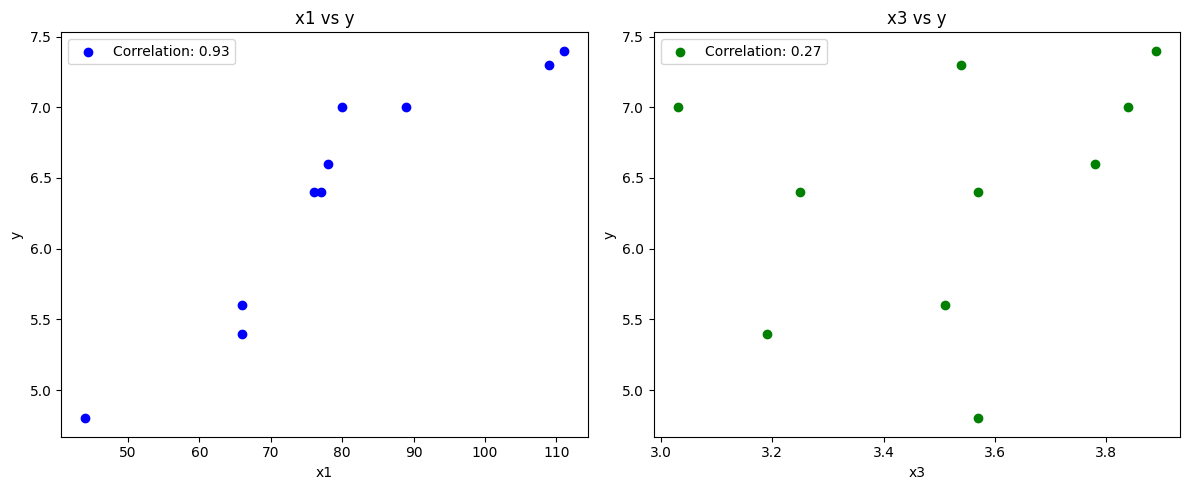

In [14]:
def calculate_corr_coef(x, y):
    numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    denominator = np.sqrt(np.sum((x - np.mean(x))**2)) * np.sqrt(np.sum((y - np.mean(y))**2))
    return numerator / denominator

x1 = np.array(newdf["x1"])
x3 = np.array(newdf["x3"])
y = np.array(newdf["y"])

corr_coef_x1 = calculate_corr_coef(x1, y)
corr_coef_x3 = calculate_corr_coef(x3, y)


# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot for x1 vs y
ax[0].scatter(x1, y, color='blue', label=f'Correlation: {corr_coef_x1:.2f}')
ax[0].set_title('x1 vs y')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[0].legend()

# Plot for x3 vs y
ax[1].scatter(x3, y, color='green', label=f'Correlation: {corr_coef_x3:.2f}')
ax[1].set_title('x3 vs y')
ax[1].set_xlabel('x3')
ax[1].set_ylabel('y')
ax[1].legend()

plt.tight_layout()
plt.show()




In [15]:
y = np.array(newdf["y"])
y

array([7. , 5.4, 6.6, 7.4, 4.8, 6.4, 7. , 5.6, 7.3, 6.4])

In [20]:
features = np.array(newdf.drop("y", axis=1))
features

array([[ 89.  ,   3.84],
       [ 66.  ,   3.19],
       [ 78.  ,   3.78],
       [111.  ,   3.89],
       [ 44.  ,   3.57],
       [ 77.  ,   3.57],
       [ 80.  ,   3.03],
       [ 66.  ,   3.51],
       [109.  ,   3.54],
       [ 76.  ,   3.25]])

In [21]:
X = np.insert(features, 0, 1, axis=1)
X

array([[  1.  ,  89.  ,   3.84],
       [  1.  ,  66.  ,   3.19],
       [  1.  ,  78.  ,   3.78],
       [  1.  , 111.  ,   3.89],
       [  1.  ,  44.  ,   3.57],
       [  1.  ,  77.  ,   3.57],
       [  1.  ,  80.  ,   3.03],
       [  1.  ,  66.  ,   3.51],
       [  1.  , 109.  ,   3.54],
       [  1.  ,  76.  ,   3.25]])

In [22]:
rows = df["x1"].shape[0]
ones = np.ones([rows, 1])
X = np.hstack((ones,features))
X

array([[  1.  ,  89.  ,   3.84],
       [  1.  ,  66.  ,   3.19],
       [  1.  ,  78.  ,   3.78],
       [  1.  , 111.  ,   3.89],
       [  1.  ,  44.  ,   3.57],
       [  1.  ,  77.  ,   3.57],
       [  1.  ,  80.  ,   3.03],
       [  1.  ,  66.  ,   3.51],
       [  1.  , 109.  ,   3.54],
       [  1.  ,  76.  ,   3.25]])

**b =(X^T . X)^-1 . X^T . Y** 

In [23]:
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

print("Beta0: {:.3f},      Beta1: {:.3f},         Beta2: {:.3f}.".format(beta[0],beta[1],beta[2]))



Beta0: 3.868,      Beta1: 0.041,         Beta2: -0.219.


In [24]:
ybar = np.mean(y)

# Assuming you have calculated your betas (coefficients)
# Replace these with your actual calculated beta values
yhat = beta[0] + beta[1] * df['x1'] + beta[2] * df['x3']

mae = np.mean(np.abs(y - yhat))
mse = np.mean((y - yhat)**2)
rmse = np.sqrt(np.mean((y - yhat)**2))
sse = np.sum((y - yhat)**2)
sst = np.sum((y - ybar)**2)
r2 = 1 - sse/sst

# Assuming 'features' is your DataFrame without the target variable ('sales' in the original context)
features = df.drop('y', axis=1)
n = len(y)
p = features.shape[1] # Number of features

r2a = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")
print(f"Adjusted R2: {r2a:.3f}")

MAE: 0.268
MSE: 0.091
RMSE: 0.301
R2: 0.866
Adjusted R2: 0.799
